In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import time
# dec. sobre a função: @jit(nopython=True)

Iterations: 199


Text(0, 0.5, 'Potential (V)')

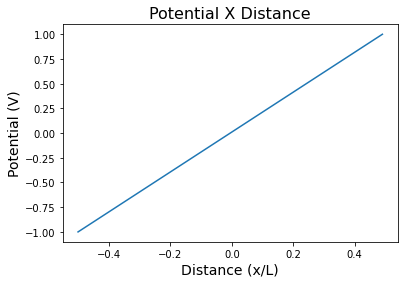

In [2]:
## Unidimensional Region Between Plates ##

n = 100
initialGuess = np.zeros(n)
initialGuess[-1], initialGuess[0] = 1, -1
domain = np.arange(n)/n - 0.5
w = 1.941

def sorMethod1D(potential, convergenceCriteria, w):
    n = potential.shape[0]
    iterations = 0
    residue = 1
    wBest, nIterations = 0, 10000
    
    while residue > convergenceCriteria:
        iterations += 1
        formerPotential = np.copy(potential)
        for j in range(1, n-1):
            potential[j] = (1-w)*potential[j] + w*(potential[j-1] + potential[j+1])/2
        residue = np.linalg.norm(potential - formerPotential)
        if iterations >= 20000:
            print(f'Exceeded maximum iterations allowed (w = {w})')
            print(f'Current residue: {residue}')
            break        
    return (potential, iterations)

potentialBetweenPlates, iterations = sorMethod1D(initialGuess, 1e-4, w)


print(f'Iterations: {iterations}')
plt.plot(domain , potentialBetweenPlates)
plt.title("Potential X Distance", fontsize=16)
plt.xlabel("Distance (x/L)", fontsize=14)
plt.ylabel("Potential (V)", fontsize=14)

Iterations: 5608


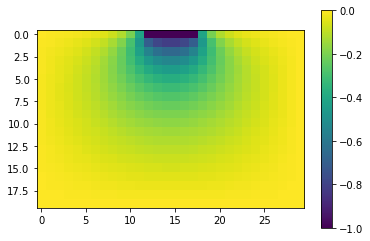

In [21]:
## Bidimensional Region Under Plate ##
xDomainSize = 20
yDomainSize = 30
meshSize = xDomainSize + yDomainSize
elementSize = 1

initialGuess = np.resize(np.zeros(meshSize), (xDomainSize, yDomainSize))
for i in range(12, 18):
    initialGuess[0][i] = -1

# SOR Method #

residue = 1
convergenceCriteria = 1e-4
potential = initialGuess
w = 1

while residue > convergenceCriteria:
    iterations += 1
    formerPotential = np.copy(potential)
    
    for i in range(0, xDomainSize-1):
        for j in range(0, yDomainSize-1):
            if i == 0 and j in range(12, 18):
                continue
            potential[i][j] = (1-w)*potential[i][j] + w*(potential[i][j-1] + potential[i][j+1] + potential[i+1][j] + potential[i-1][j])/4
    
    residue = np.linalg.norm(potential - formerPotential)
    if iterations >= 20000:
        print(f'Exceeded maximum iterations allowed (w = {w})')
        print(f'Current residue: {residue}')
        break

print(f'Iterations: {iterations}')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(potential)
fig.colorbar(im)


Iterations: 5828


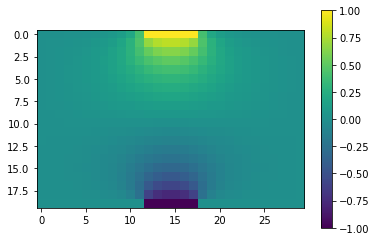

In [25]:
## Bidimensional Region Between Plates ##
xDomainSize = 20
yDomainSize = 30
meshSize = xDomainSize + yDomainSize
elementSize = 1

initialGuess = np.resize(np.zeros(meshSize), (xDomainSize, yDomainSize))
for i in range(12, 18):
    initialGuess[0][i] = 1
    initialGuess[-1][i] = -1

# SOR Method #

residue = 1
convergenceCriteria = 1e-4
potential = initialGuess
w = 1

while residue > convergenceCriteria:
    iterations += 1
    formerPotential = np.copy(potential)
    
    for i in range(0, xDomainSize-1):
        for j in range(0, yDomainSize-1):
            if i == 0 and j in range(12, 18):
                continue
            potential[i][j] = (1-w)*potential[i][j] + w*(potential[i][j-1] + potential[i][j+1] + potential[i+1][j] + potential[i-1][j])/4
    
    residue = np.linalg.norm(potential - formerPotential)
    if iterations >= 20000:
        print(f'Exceeded maximum iterations allowed (w = {w})')
        print(f'Current residue: {residue}')
        break

print(f'Iterations: {iterations}')

fig, ax = plt.subplots(1, 1)
im = ax.imshow(potential)
fig.colorbar(im)


In [ ]:
# Observations:
# 1. On row 0 and column 0, potential[i-1][j] gets potential[-1][0], which is on the bottom row.
# 2. Potential for region between plates doesn't alter the last row.
# 3. Potential for a quadrant region under a plate has the (1) problem too, and atualizes wrong for first collumn.